3.662755
Searching for fits with the last value: 35.53571429
            NALEZENO: 27.61607143, deviace: 0.5941328599999984
            NALEZENO: 24.25, deviace: 0.297449290000003
            NALEZENO: 17.43571429, deviace: 0.21377499999999827
            NALEZENO: 12.57321429, deviace: 0.9859700000000018
y_vals: [12.57321429 17.43571429 24.25       27.61607143 35.53571429]
Searching for fits with the last value: 26.83928572
            NALEZENO: 19.5, deviace: 0.01377571999999816
            NALEZENO: 15.94642857, deviace: 0.09540785000000085
            NALEZENO: 12.51785714, deviace: 0.32959142000000163
            NALEZENO: 8.464285714, deviace: 0.06122500599999903
            NALEZENO: 4.848214286, deviace: 0.014541433999998965
y_vals: [ 4.84821429  8.46428571 12.51785714 15.94642857 19.5        26.83928572]
Searching for fits with the last value: 24.99285714
            NALEZENO: 21.375, deviace: 0.04489785999999896
            NALEZENO: 17.69285714, deviace: 0.025510000000000588

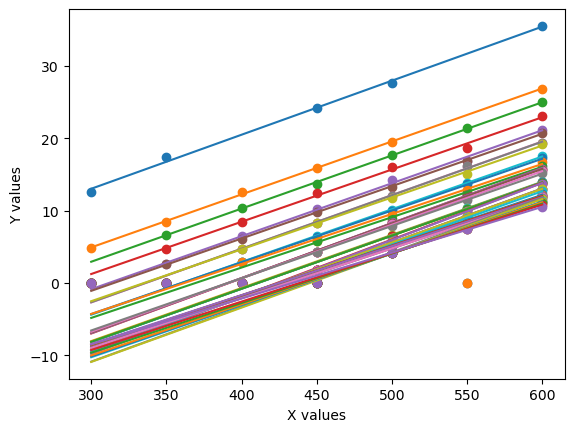

In [59]:
# /c:/Users/Admin/Documents/Fyzikalni praktikum/3 - Milikanuv experiment/plot_data.py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import tqdm
import sys
from itertools import combinations

a = 0.0732551
b = -8.707908
print (50*a)

def linear_model(x, K, b):
    return K * x + b

bf = []

def bisection(options, k, v600):
    df=[]
    for i in range(len(options)):
        df.append((options[i], abs(options[i] - (v600 - k * 3.662755))))
    found = min(df, key=lambda v: v[1])

    if abs(found[0] - (v600 - k * 3.662755)) > 1:
        found = [0,0]
    else:
        print(f"            NALEZENO: {found[0]}, deviace: {abs(found[0] - (v600 - k * 3.662755))}")

    return found[0]



def find_best_fits(file_path):
    best_fits = []
    global bf
    vals = []


    # Read the CSV file
    data = pd.read_csv(file_path, header=None)
    data = data.T

    # Extract and reverse the values for each column
    for i in range(7):
        val = data.iloc[1:, i].dropna().astype(float).to_numpy()
        val = val[::-1]
        vals.append(val)

    vals300, vals350, vals400, vals450, vals500, vals550, vals600 = vals
    r_squared = 0


    for v600 in vals600:
        print("Searching for fits with the last value: " + str(v600))
        
        v550 = bisection(vals550, 1, v600)
        v500 = bisection(vals500, 2, v600)
        v450 = bisection(vals450, 3, v600)
        v400 = bisection(vals400, 4, v600)
        v350 = bisection(vals350, 5, v600)
        v300 = bisection(vals300, 6, v600)
        

        x_vals = [300, 350, 400, 450, 500, 550, 600]
        y_vals = [v300, v350, v400, v450, v500, v550, v600]
        # Filter out zeros from y_vals and corresponding x_vals
        mask = np.array(y_vals) != 0
        x_vals = np.array(x_vals)[mask]
        y_vals = np.array(y_vals)[mask]
        print(f'y_vals: {y_vals}')
        if len(y_vals) >= 3:
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            popt, pcov = curve_fit(linear_model, x_vals, y_vals)
            uncertainties = np.sqrt(np.diag(pcov))
            residuals = y_vals - linear_model(x_vals, *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((y_vals - np.mean(y_vals))**2)
            r_squared = 1 - (ss_res / ss_tot)
            #print(f'Fit: K={popt[0]:.2f}, b={popt[1]:.2f}, R²={r_squared:.2f}')
            #print(f'X values: {x_vals}')
            #print(f'Y values: {y_vals}')
            #print(f'Uncertainties: {uncertainties}')
            #print()
            best_fits.append((v300, v350, v400, v450, v500, v550, v600, *popt, uncertainties, r_squared))
            bf.append((v300, v350, v400, v450, v500, v550, v600, *popt, uncertainties, r_squared))
    return best_fits
                                            

                                                        
                                                        
                                        

                               
                                    
                                    


def plot_best_fits(best_fits):
    plt.figure()
    x_values = np.array([300, 350, 400, 450, 500, 550, 600])
    for v300, v350, v400, v450, v500, v550, v600, *popt, uncertainties, r_squared in best_fits:
        y_data = np.array([v300, v350, v400, v450, v500, v550, v600])
        K = popt[0]
        b = popt[1]
        plt.scatter(x_values, y_data, label=f'Fit: K={K:.2f}, b={b:.2f}, R²={r_squared:.2f}')
        plt.plot(x_values, linear_model(x_values, K, b), linestyle='-')
    
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.show()





def plot_csv_data(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)
    
    # Extract x values (first column)
    x_values = data.iloc[:, 0]
    
    # Extract y values (all other columns)
    y_values = data.iloc[:, 1:]
    
    # Plot each column of y values against x values
    for column in y_values.columns:
        plt.scatter(x_values, y_values[column], label=column)
    
    # Add labels
    plt.xlabel('X values')
    plt.ylabel('Y values')
    # plt.legend()  # Hide the legend
    plt.show()

# Example usage
file_path = 'mrdka.csv'
best_fits = find_best_fits(file_path)
plot_best_fits(best_fits)
#plot_csv_data(file_path)

In [5]:
import csv



# Save the bf list to a CSV file
with open('bf.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['v300', 'v350', 'v400', 'v450', 'v500', 'v550', 'v600', 'K', 'b', 'uncertainties', 'r_squared'])
    for row in tqdm.tqdm(bf):
        writer.writerow(row)

0it [00:00, ?it/s]


In [ ]:
# /c:/Users/Admin/Documents/Fyzikalni praktikum/3 - Milikanuv experiment/plot_data.py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import tqdm
import sys
from itertools import combinations

a = 0.0732551
b = -8.707908

def linear_model(x, K, b):
    return K * x + b

bf = []


def find_best_fits(file_path):
    best_fits = []
    global bf
    vals = []


    # Read the CSV file
    data = pd.read_csv(file_path, header=None)
    data = data.T

    # Extract and reverse the values for each column
    for i in range(7):
        val = data.iloc[1:, i].dropna().astype(float).to_numpy()
        val = val[::-1]
        vals.append(val)

    vals300, vals350, vals400, vals450, vals500, vals550, vals600 = vals
    print (vals600)
    exit()
    r_squared = 0
    r_squared_old = 0
    DONOTSKIP = False


    for v600 in vals600:
        print("Searching for fits with the last value: " + str(v600))
        if r_squared < r_squared_old and v600_old > v600 and DONOTSKIP == False:
            r_squared = 0
            print("R squared is lower than before, skipping. Found probable best fit: ", bf[-1], "with v600 = ", v600)
            DONOTSKIP = True
            continue
        DONOTSKIP = False
        v600_old = v600
        for v550 in vals550:
            if r_squared < r_squared_old and v550_old > v550 and DONOTSKIP == False:
                r_squared = 0
                print("R squared is lower than before, skipping. Found probable best fit: ", bf[-1], "with v550 = ", v550)
                DONOTSKIP = True
                continue               
            DONOTSKIP = False
            v550_old = v550
            for v500 in tqdm.tqdm(vals500):
                if r_squared < r_squared_old and v500_old > v500 and DONOTSKIP == False:
                    r_squared = 0
                    print("R squared is lower than before, skipping. Found probable best fit with v500 = ", v500)
                    DONOTSKIP = True
                    continue
                DONOTSKIP = False
                v500_old = v500
                for v450 in vals450:
                    if r_squared < r_squared_old and v450_old > v450 and DONOTSKIP == False:
                        r_squared = 0
                        print("R squared is lower than before, skipping. Found probable best fit with v450 = ", v450)
                        DONOTSKIP = True
                        continue
                    DONOTSKIP = False
                    v450_old = v450
                    for v400 in vals400:
                        if r_squared < r_squared_old and v400_old > v400 and DONOTSKIP == False:
                            r_squared = 0
                            print("R squared is lower than before, skipping. Found probable best fit with v400 = ", v400)
                            DONOTSKIP = True
                            continue
                        DONOTSKIP = False
                        v400_old = v400
                        for v350 in vals350:
                            if r_squared < r_squared_old and v350_old> v350 and DONOTSKIP == False:
                                r_squared = 0
                                print("R squared is lower than before, skipping. Found probable best fit for with v350 = ", v350)
                                DONOTSKIP = True
                                continue
                            DONOTSKIP = False
                            v350_old = v350

                            for v300 in vals300:
                                v300_old = v300
                                
                                conditions = []
                                a = int(v600 > v550)
                                b = int(v550 > v500)
                                c = int(v500 > v450)
                                d = int(v450 > v400)
                                e = int(v400 > v350)
                                f = int(v350 > v300)

                                if a + b + c + d + e + f >= 6:
                                    #print("Conditions met for fitting, total: ", a + b + c + d + e + f, " members, code: ", str(a) + str(b) + str(c) + str(d) + str(e) + str(f))

                                    #conditions = {
                                      #  '111111': ([600, 550, 500, 450, 400, 350, 300], [v600, v550, v500, v450, v400, v350, v300]),
                                       # 3'111110': ([600, 550, 500, 450, 400, 350], [v600, v550, v500, v450, v400, v350]),
                                        #'111100': ([600, 550, 500, 450, 400], [v600, v550, v500, v450, v400]),
                                        #'111000': ([600, 550, 500, 450], [v600, v550, v500, v450]),
                                       # '011111': ([550, 500, 450, 400, 350, 300], [v550, v500, v450, v400, v350, v300]),
                                       # '011110': ([550, 500, 450, 400, 350], [v550, v500, v450, v400, v350]),
                                        #'011100': ([550, 500, 450, 400], [v550, v500, v450, v400]),
                                        #'001111': ([500, 450, 400, 350, 300], [v500, v450, v400, v350, v300]),
                                        #'001110': ([500, 450, 400, 350], [v500, v450, v400, v350]),
                                        #'000111': ([450, 400, 350, 300], [v450, v400, v350, v300])
                                    #}

                                    #key = str(a) + str(b) + str(c) + str(d) + str(e) + str(f)
                                    #if key in conditions:
                                    #x_vals, y_vals = conditions[key]
                                    x_vals = [300, 350, 400, 450, 500, 550, 600]
                                    y_vals = [v300, v350, v400, v450, v500, v550, v600]
                                    x_vals = np.array(x_vals)
                                    y_vals = np.array(y_vals)
                                    popt, pcov = curve_fit(linear_model, x_vals, y_vals)
                                    uncertainties = np.sqrt(np.diag(pcov))
                                    residuals = y_vals - linear_model(x_vals, *popt)
                                    ss_res = np.sum(residuals**2)
                                    ss_tot = np.sum((y_vals - np.mean(y_vals))**2)
                                    r_squared_old = r_squared
                                    r_squared = 1 - (ss_res / ss_tot)
                                    if r_squared > 0.97:
                                        print(f'Fit: K={popt[0]:.2f}, b={popt[1]:.2f}, R²={r_squared:.2f}')
                                        print(f'X values: {x_vals}')
                                        print(f'Y values: {y_vals}')
                                        print(f'Uncertainties: {uncertainties}')
                                        print()
                                        best_fits.append((v300, v350, v400, v450, v500, v550, v600, *popt, uncertainties, r_squared))
                                        bf.append((v300, v350, v400, v450, v500, v550, v600, *popt, uncertainties, r_squared))
    return best_fits
                                            

                                                        
                                                        
                                        

                               
                                    
                                    


def plot_best_fits(best_fits):
    plt.figure()
    for x_values, y_data, K, b, uncertainties, r_squared in best_fits:
        plt.scatter(x_values, y_data, label=f'Fit: K={K:.2f}, b={b:.2f}, R²={r_squared:.2f}')
        plt.plot(x_values, linear_model(x_values, K, b), linestyle='--')
    
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.show()





def plot_csv_data(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)
    
    # Extract x values (first column)
    x_values = data.iloc[:, 0]
    
    # Extract y values (all other columns)
    y_values = data.iloc[:, 1:]
    
    # Plot each column of y values against x values
    for column in y_values.columns:
        plt.scatter(x_values, y_values[column], label=column)
    
    # Add labels
    plt.xlabel('X values')
    plt.ylabel('Y values')
    # plt.legend()  # Hide the legend
    plt.show()

# Example usage
file_path = 'mrdka2.csv'
best_fits = find_best_fits(file_path)
#plot_best_fits(best_fits)
#plot_csv_data(file_path)